In [ ]:
import pandas as pd
# 1. Загрузка данных
df = pd.read_csv('lenta-ru-news_2010_2024.csv')  # укажи правильный путь к файлу

# --- Очистка датасета ---

# 1. Удаляем записи без текста или темы
print(f"До удаления пропусков: {df.shape}")
df = df.dropna(subset=['text', 'topic']).reset_index(drop=True)
print(f"После удаления пропусков: {df.shape}")

# 2. Удаляем темы с количеством статей < 100
topic_counts = df['topic'].value_counts()
topics_to_keep = topic_counts[topic_counts >= 100].index

print(f"\nТем, где >= 100 статей: {len(topics_to_keep)}")

df = df[df['topic'].isin(topics_to_keep)].reset_index(drop=True)
print(f"После удаления редких тем: {df.shape}")

# 3. Проверим финальное распределение тем
print("\nРаспределение статей по темам после чистки:")
print(df['topic'].value_counts())


# --- Ограничение: оставляем по 100 записей для каждой темы ---

df_balanced = df.groupby('topic', group_keys=False).apply(lambda x: x.sample(100, random_state=42)).reset_index(drop=True)

print(f"\nФинальный размер сбалансированного датасета: {df_balanced.shape}")
print("Распределение после балансировки (по 100 записей на тему):")
print(df_balanced['topic'].value_counts())

C:\Users\stepan\AppData\Local\Temp\ipykernel_12968\2387329014.py:3: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



До удаления пропусков: (1189509, 8)
После удаления пропусков: (1127477, 8)

Тем, где >= 100 статей: 17
После удаления редких тем: (1119535, 8)

Распределение статей по темам после чистки:
topic
Россия               211960
Мир                  179218
Бывший СССР          113909
Экономика            113754
Спорт                 76926
Силовые структуры     69034
Наука и техника       67263
Интернет и СМИ        57016
Культура              54340
Из жизни              40347
Ценности              34363
Путешествия           32866
Среда обитания        23113
Дом                   15663
Забота о себе         12685
Моя страна             9637
Бизнес                 7441
Name: count, dtype: int64


ValueError: Cannot take a larger sample than population when 'replace=False'

In [15]:
import pandas as pd

# 1. Загрузка данных
df = pd.read_csv('lenta-ru-news_2010_2024.csv')  # укажи правильный путь к файлу

# --- Очистка датасета ---
# 1. Удаляем записи без текста или темы
print(f"До удаления пропусков: {df.shape}")
df = df.dropna(subset=['text', 'topic']).reset_index(drop=True)
print(f"После удаления пропусков: {df.shape}")

# 2. Удаляем темы с количеством статей < 5000
topic_counts = df['topic'].value_counts()
topics_to_keep = topic_counts[topic_counts >= 5000].index

print(f"\nТем, где >= 5000 статей: {len(topics_to_keep)}")

df = df[df['topic'].isin(topics_to_keep)].reset_index(drop=True)
print(f"После удаления редких тем: {df.shape}")

# 3. Проверим финальное распределение тем
print("\nРаспределение статей по темам после чистки:")
print(df['topic'].value_counts())


# --- Ограничение: оставляем по 10k записей для каждой темы ---
df_balanced = df.groupby('topic', group_keys=False).apply(
    lambda x: x.sample(min(len(x), 10000), random_state=42)
).reset_index(drop=True)

print(f"\nФинальный размер сбалансированного датасета: {df_balanced.shape}")
print("Распределение после балансировки (по 10к записей на тему):")
print(df_balanced['topic'].value_counts())

# Сохраняем исправленный датафрейм в новый CSV файл
df_balanced.to_csv('lenta-ru-news_balanced.csv', index=False)

print("Датафрейм сохранен в файл 'lenta-ru-news_balanced.csv'")

C:\Users\stepan\AppData\Local\Temp\ipykernel_12968\3270536512.py:4: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



До удаления пропусков: (1189509, 8)
После удаления пропусков: (1127477, 8)

Тем, где >= 5000 статей: 17
После удаления редких тем: (1119535, 8)

Распределение статей по темам после чистки:
topic
Россия               211960
Мир                  179218
Бывший СССР          113909
Экономика            113754
Спорт                 76926
Силовые структуры     69034
Наука и техника       67263
Интернет и СМИ        57016
Культура              54340
Из жизни              40347
Ценности              34363
Путешествия           32866
Среда обитания        23113
Дом                   15663
Забота о себе         12685
Моя страна             9637
Бизнес                 7441
Name: count, dtype: int64


C:\Users\stepan\AppData\Local\Temp\ipykernel_12968\3270536512.py:27: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.




Финальный размер сбалансированного датасета: (167078, 8)
Распределение после балансировки (по 10к записей на тему):
topic
Экономика            10000
Ценности             10000
Дом                  10000
Забота о себе        10000
Из жизни             10000
Интернет и СМИ       10000
Культура             10000
Мир                  10000
Бывший СССР          10000
Наука и техника      10000
Путешествия          10000
Россия               10000
Силовые структуры    10000
Спорт                10000
Среда обитания       10000
Моя страна            9637
Бизнес                7441
Name: count, dtype: int64
Датафрейм сохранен в файл 'lenta-ru-news_balanced.csv'


In [1]:
import pandas as pd
df_balanced = pd.read_csv('lenta-ru-news_balanced.csv')  # укажи правильный путь к файлу

# Logistic Regression (через TF-IDF)

📊 Метрики на тренировочной выборке:
Accuracy: 0.8646
Macro F1-score: 0.8642
Weighted F1-score: 0.8644

📊 Classification Report (на тестовой выборке):
                   precision    recall  f1-score   support

           Бизнес       0.79      0.78      0.78      1488
      Бывший СССР       0.79      0.82      0.81      2000
              Дом       0.90      0.87      0.88      2000
    Забота о себе       0.91      0.95      0.93      2000
         Из жизни       0.78      0.80      0.79      2000
   Интернет и СМИ       0.75      0.71      0.73      2000
         Культура       0.84      0.86      0.85      2000
              Мир       0.71      0.75      0.73      2000
       Моя страна       0.87      0.89      0.88      1928
  Наука и техника       0.86      0.85      0.85      2000
      Путешествия       0.87      0.87      0.87      2000
           Россия       0.66      0.63      0.64      2000
Силовые структуры       0.84      0.83      0.83      2000
            Спорт      

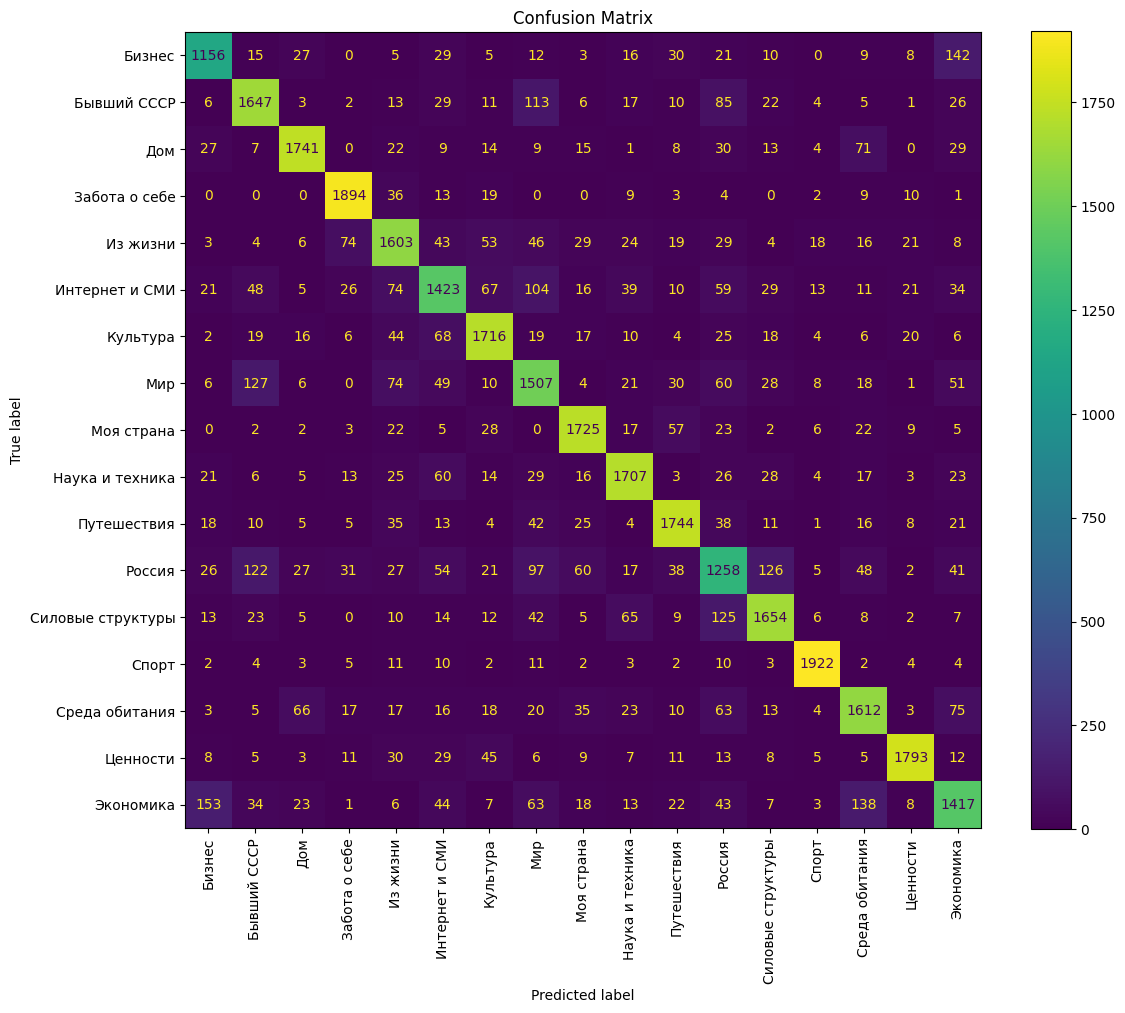

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay
)
import joblib  # для сохранения

# --- 1️⃣ Данные ---
texts = df_balanced['text']
labels = df_balanced['topic']

# --- 2️⃣ Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# --- 3️⃣ TF-IDF ---
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words=None
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# --- 4️⃣ Модель ---
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

# --- 5️⃣ Предсказания ---
y_train_pred = model.predict(X_train_tfidf)
y_test_pred = model.predict(X_test_tfidf)

# --- 6️⃣ Метрики на тренировочной выборке ---
train_accuracy = accuracy_score(y_train, y_train_pred)
train_macro_f1 = f1_score(y_train, y_train_pred, average='macro')
train_weighted_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("📊 Метрики на тренировочной выборке:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Macro F1-score: {train_macro_f1:.4f}")
print(f"Weighted F1-score: {train_weighted_f1:.4f}\n")

# --- 7️⃣ Метрики на тестовой выборке ---
print("📊 Classification Report (на тестовой выборке):")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
test_weighted_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"\n📌 Метрики на тестовой выборке:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Macro F1-score: {test_macro_f1:.4f}")
print(f"Weighted F1-score: {test_weighted_f1:.4f}")

# --- 8️⃣ Сохранение модели и векторайзера ---
joblib.dump(model, "logreg_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer_5000.pkl")
print("Модель и векторизатор сохранены!")

# --- 9️⃣ Визуализация матрицы ошибок ---
fig, ax = plt.subplots(figsize=(12, 10))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, xticks_rotation=90, ax=ax)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


📊 Метрики на тренировочной выборке:
Accuracy: 0.8875
Macro F1-score: 0.8871
Weighted F1-score: 0.8873

📊 Classification Report (на тестовой выборке):
                   precision    recall  f1-score   support

           Бизнес       0.80      0.79      0.79      1488
      Бывший СССР       0.81      0.84      0.82      2000
              Дом       0.90      0.88      0.89      2000
    Забота о себе       0.91      0.95      0.93      2000
         Из жизни       0.80      0.82      0.81      2000
   Интернет и СМИ       0.78      0.74      0.76      2000
         Культура       0.86      0.88      0.87      2000
              Мир       0.73      0.77      0.75      2000
       Моя страна       0.89      0.91      0.90      1928
  Наука и техника       0.87      0.87      0.87      2000
      Путешествия       0.87      0.88      0.88      2000
           Россия       0.68      0.65      0.66      2000
Силовые структуры       0.85      0.84      0.85      2000
            Спорт      

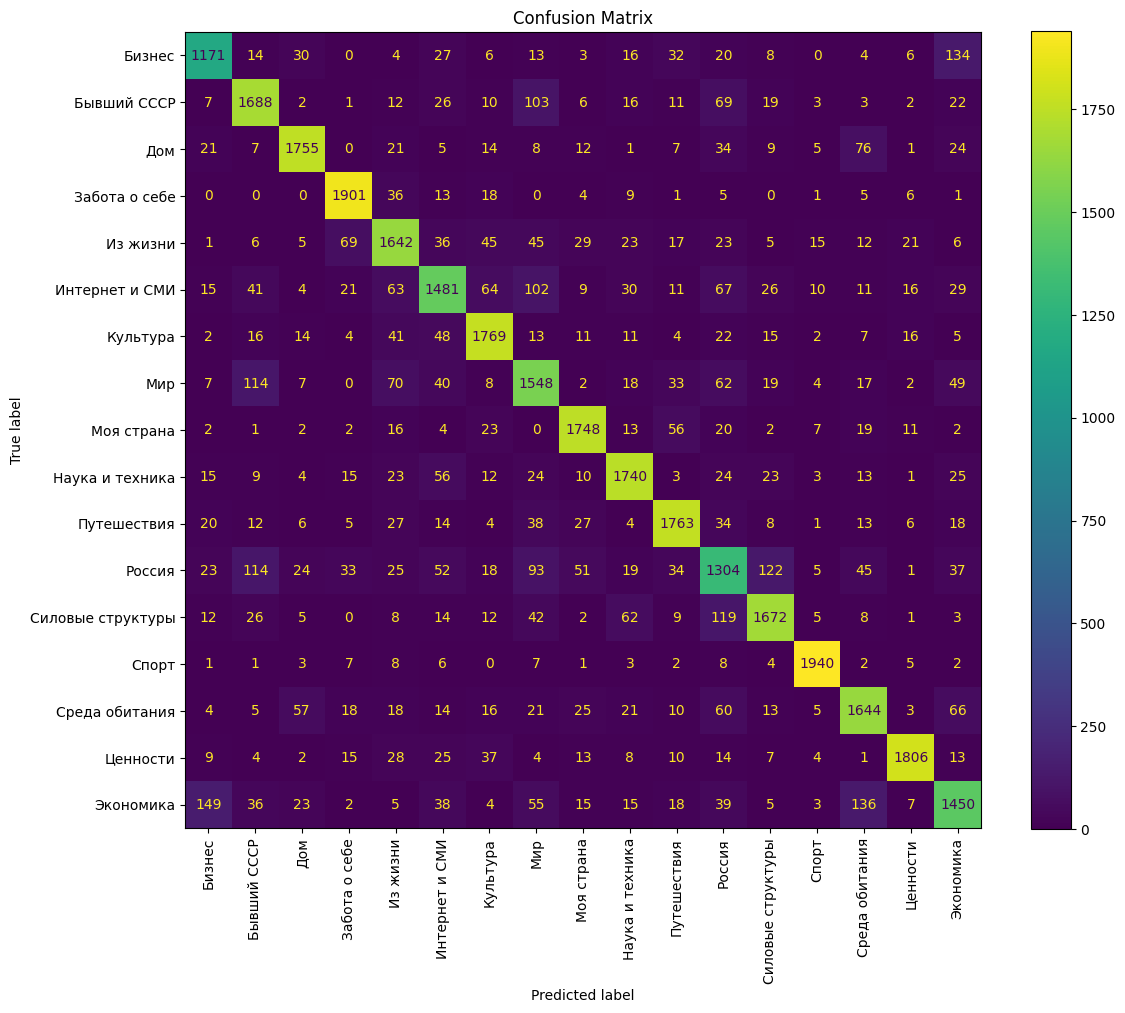

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay
)
import joblib  # для сохранения

# --- 1️⃣ Данные ---
texts = df_balanced['text']
labels = df_balanced['topic']

# --- 2️⃣ Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# --- 3️⃣ TF-IDF ---
vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    stop_words=None
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# --- 4️⃣ Модель ---
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

# --- 5️⃣ Предсказания ---
y_train_pred = model.predict(X_train_tfidf)
y_test_pred = model.predict(X_test_tfidf)

# --- 6️⃣ Метрики на тренировочной выборке ---
train_accuracy = accuracy_score(y_train, y_train_pred)
train_macro_f1 = f1_score(y_train, y_train_pred, average='macro')
train_weighted_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("📊 Метрики на тренировочной выборке:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Macro F1-score: {train_macro_f1:.4f}")
print(f"Weighted F1-score: {train_weighted_f1:.4f}\n")

# --- 7️⃣ Метрики на тестовой выборке ---
print("📊 Classification Report (на тестовой выборке):")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
test_weighted_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"\n📌 Метрики на тестовой выборке:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Macro F1-score: {test_macro_f1:.4f}")
print(f"Weighted F1-score: {test_weighted_f1:.4f}")

# --- 8️⃣ Сохранение модели и векторайзера ---
joblib.dump(model, "logreg_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer_10000.pkl")
print("Модель и векторизатор сохранены!")

# --- 9️⃣ Визуализация матрицы ошибок ---
fig, ax = plt.subplots(figsize=(12, 10))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, xticks_rotation=90, ax=ax)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


📊 Метрики на тренировочной выборке:
Accuracy: 0.8966
Macro F1-score: 0.8963
Weighted F1-score: 0.8964

📊 Classification Report (на тестовой выборке):
                   precision    recall  f1-score   support

           Бизнес       0.82      0.79      0.80      1488
      Бывший СССР       0.81      0.85      0.83      2000
              Дом       0.91      0.88      0.89      2000
    Забота о себе       0.91      0.95      0.93      2000
         Из жизни       0.81      0.82      0.81      2000
   Интернет и СМИ       0.79      0.75      0.77      2000
         Культура       0.87      0.89      0.88      2000
              Мир       0.74      0.78      0.76      2000
       Моя страна       0.89      0.91      0.90      1928
  Наука и техника       0.87      0.88      0.87      2000
      Путешествия       0.88      0.89      0.88      2000
           Россия       0.67      0.65      0.66      2000
Силовые структуры       0.85      0.84      0.85      2000
            Спорт      

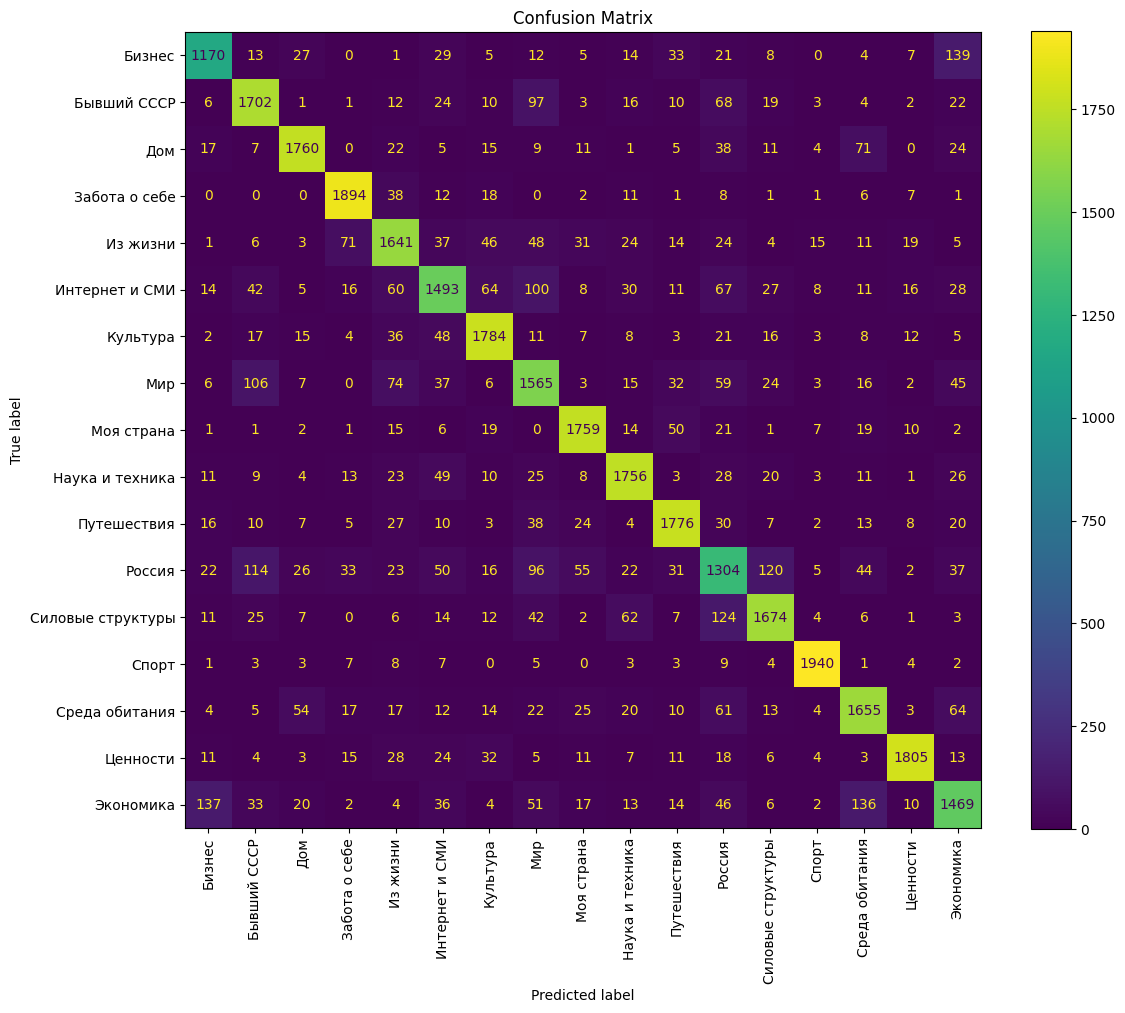

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    roc_auc_score,
    ConfusionMatrixDisplay
)
import joblib  # для сохранения

# --- 1️⃣ Данные ---
texts = df_balanced['text']
labels = df_balanced['topic']

# --- 2️⃣ Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# --- 3️⃣ TF-IDF ---
vectorizer = TfidfVectorizer(
    max_features=15000,
    ngram_range=(1, 2),
    stop_words=None
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# --- 4️⃣ Модель ---
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

# --- 5️⃣ Предсказания ---
y_train_pred = model.predict(X_train_tfidf)
y_test_pred = model.predict(X_test_tfidf)

# --- 6️⃣ Метрики на тренировочной выборке ---
train_accuracy = accuracy_score(y_train, y_train_pred)
train_macro_f1 = f1_score(y_train, y_train_pred, average='macro')
train_weighted_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("📊 Метрики на тренировочной выборке:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Macro F1-score: {train_macro_f1:.4f}")
print(f"Weighted F1-score: {train_weighted_f1:.4f}\n")

# --- 7️⃣ Метрики на тестовой выборке ---
print("📊 Classification Report (на тестовой выборке):")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
test_weighted_f1 = f1_score(y_test, y_test_pred, average='weighted')
# --ROC AUC (macro) ---Бинаризуем метки
y_test_bin = label_binarize(y_test, classes=model.classes_)
# Предсказанные вероятности
y_pred_prob = model.predict_proba(X_test_tfidf)
# Расчёт метрики
test_roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro')

print(f"\n📌 Метрики на тестовой выборке:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Macro F1-score: {test_macro_f1:.4f}")
print(f"Weighted F1-score: {test_weighted_f1:.4f}")
print(f"ROC AUC (macro): {test_roc_auc:.4f}")

# --- 8️⃣ Сохранение модели и векторайзера ---
joblib.dump(model, "logreg_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer_15000.pkl")
print("Модель и векторизатор сохранены!")

# --- 9️⃣ Визуализация матрицы ошибок ---
fig, ax = plt.subplots(figsize=(12, 10))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, xticks_rotation=90, ax=ax)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [8]:
import joblib

# Загрузка
loaded_model = joblib.load("logreg_model.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Пример предсказания
sample_text = ["Россия подписала новое соглашение о научном сотрудничестве."]
sample_tfidf = loaded_vectorizer.transform(sample_text)
pred = loaded_model.predict(sample_tfidf)

print(f"Предсказанный класс: {pred[0]}")

Предсказанный класс: Экономика


In [18]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Для многоклассовой задачи:
y_test_bin = label_binarize(y_test, classes=model.classes_)
y_pred_prob = model.predict_proba(X_test_tfidf)

roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro')
print(f"ROC AUC (macro): {roc_auc:.4f}")


ROC AUC (macro): 0.9866


In [5]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
for i, class_label in enumerate(model.classes_):
    top10 = np.argsort(model.coef_[i])[-10:]
    print(f"Топ слова для класса {class_label}: {[feature_names[j] for j in top10]}")


Топ слова для класса Бизнес: ['2015 года', '2016 года', 'продукции', '2016', 'роснефти', 'rambler', 'автомобилей', 'компании', 'авиакомпании', '2015']
Топ слова для класса Бывший СССР: ['украинский', 'азербайджана', 'молдавии', 'армении', 'латвии', 'белоруссии', 'грузии', 'казахстана', 'республики', 'украины']
Топ слова для класса Дом: ['строительства', 'квартир', 'квартиры', 'дома', 'недвижимость', 'жкх', 'жилья', 'сообщении', 'цитирует', 'недвижимости']
Топ слова для класса Забота о себе: ['она', 'reddit', 'предупредил', 'секса', 'предупредила', 'психолог', 'врач', 'издание', 'беседе', 'ранее']
Топ слова для класса Из жизни: ['животное', 'штата', 'не уточняется', 'daily', 'сообщалось что', 'штат', 'сообщалось', 'сообщает', 'диетолог', 'ранее сообщалось']
Топ слова для класса Интернет и СМИ: ['канала', 'пользователи', 'журналиста', 'телеканала', 'шоу', 'пользователей', 'сми', 'журналист', 'рекламы', 'телеведущий']
Топ слова для класса Культура: ['исполнитель', 'концерт', 'картины', 'п

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='f1_weighted')
print(f"Средний F1 по 5-кратной кросс-валидации: {scores.mean():.4f}")


KeyboardInterrupt: 

# Random Forest (через TF-IDF)

📊 Метрики на тренировочной выборке:
Accuracy: 0.8002
Macro F1-score: 0.7984
Weighted F1-score: 0.7979

📊 Classification Report (на тестовой выборке):
                   precision    recall  f1-score   support

           Бизнес       0.73      0.64      0.68      1488
      Бывший СССР       0.60      0.77      0.68      2000
              Дом       0.80      0.78      0.79      2000
    Забота о себе       0.69      0.93      0.79      2000
         Из жизни       0.63      0.65      0.64      2000
   Интернет и СМИ       0.63      0.30      0.40      2000
         Культура       0.73      0.71      0.72      2000
              Мир       0.52      0.55      0.54      2000
       Моя страна       0.60      0.77      0.68      1928
  Наука и техника       0.63      0.73      0.67      2000
      Путешествия       0.76      0.80      0.78      2000
           Россия       0.57      0.23      0.33      2000
Силовые структуры       0.66      0.75      0.70      2000
            Спорт      

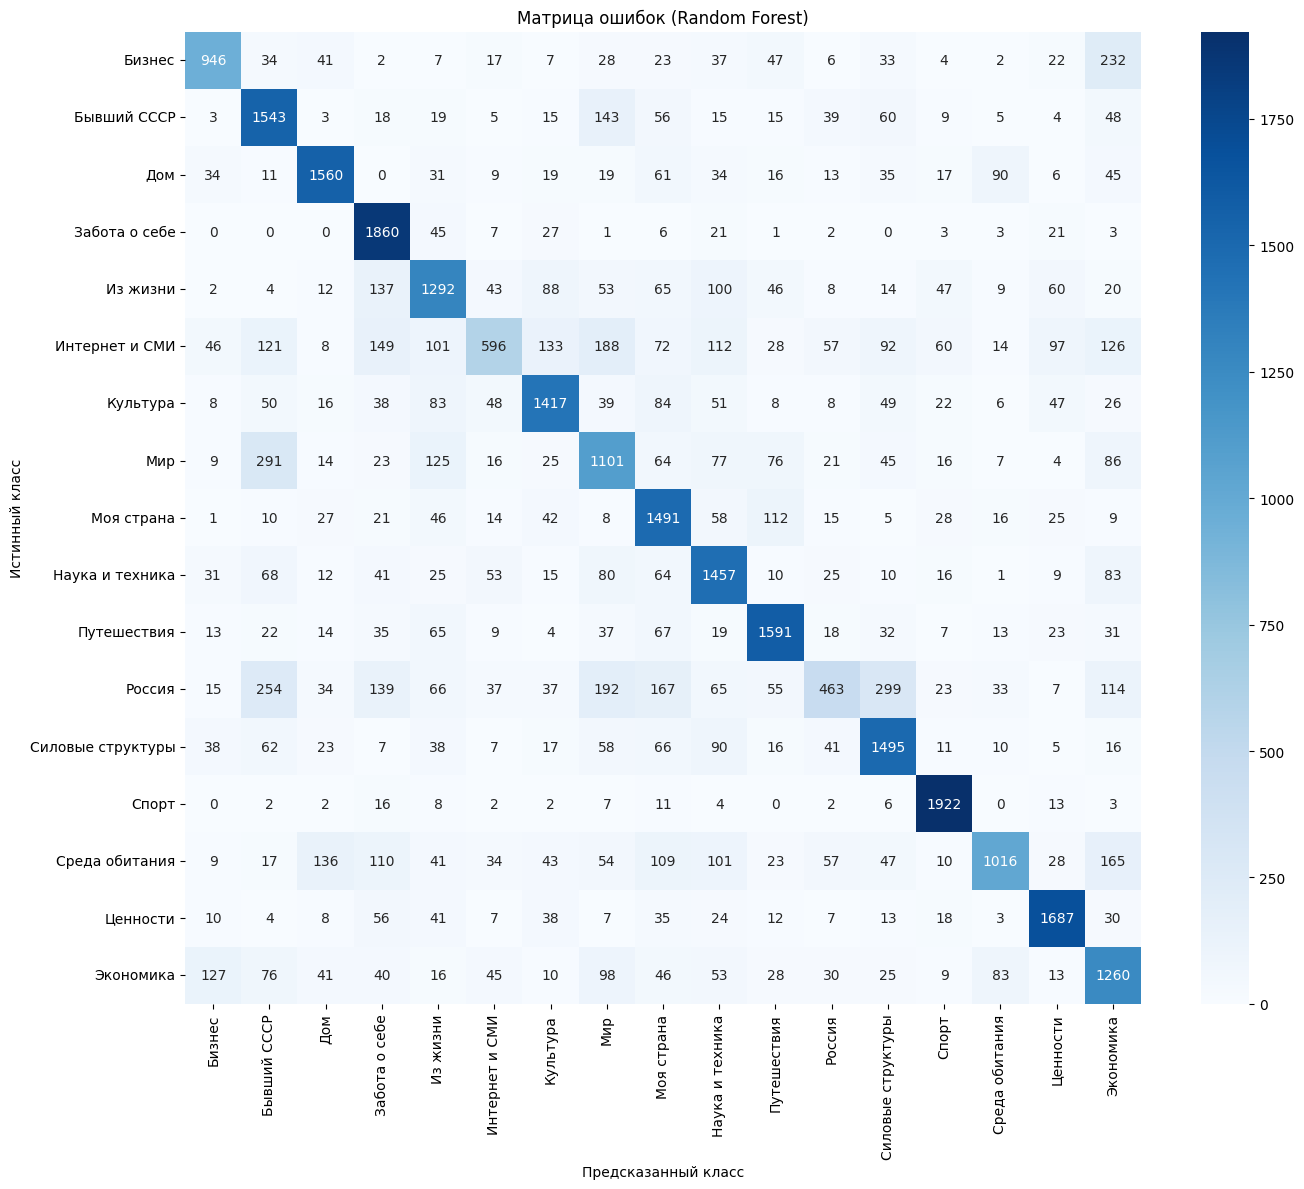

C:\Users\stepan\AppData\Local\Temp\ipykernel_22316\3355772196.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette='viridis')


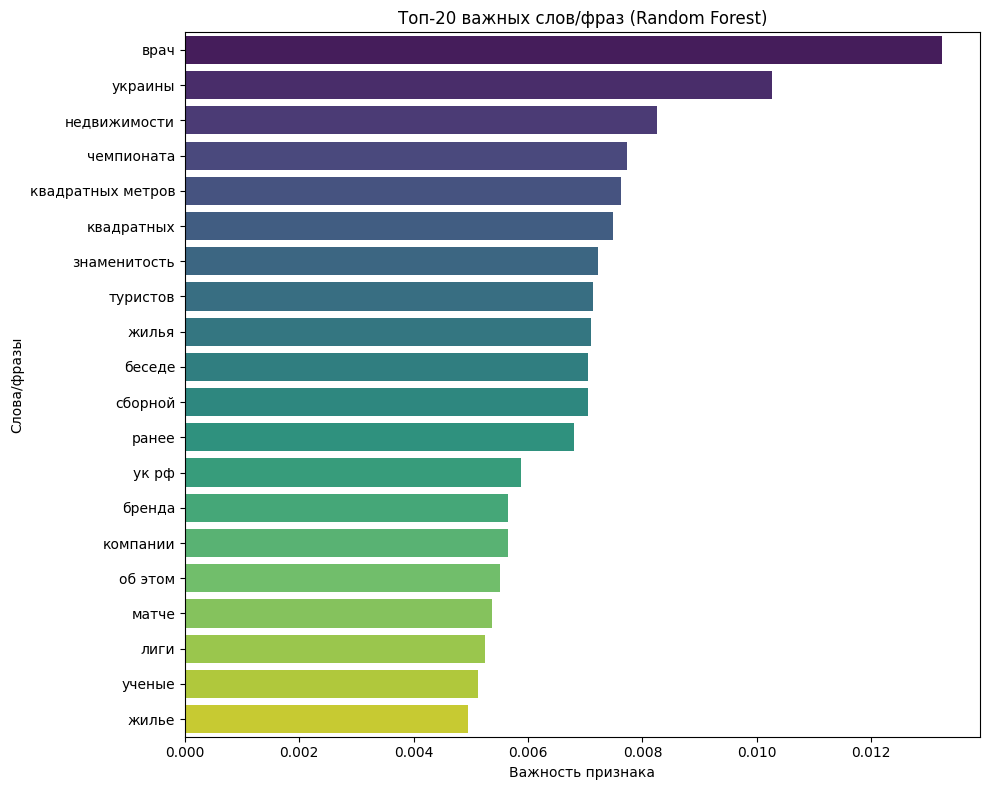

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # для загрузки/сохранения

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    roc_auc_score
)

# --- 1️⃣ Данные ---
texts = df_balanced['text']
labels = df_balanced['topic']

# --- 2️⃣ Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# --- 3️⃣ Загрузка готового векторизатора ---
vectorizer = joblib.load("tfidf_vectorizer_15000.pkl")

X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# --- 4️⃣ Random Forest ---
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train_tfidf, y_train)

# --- 5️⃣ Предсказания ---
y_train_pred = model.predict(X_train_tfidf)
y_test_pred = model.predict(X_test_tfidf)

# --- 6️⃣ Метрики на тренировочной выборке ---
train_accuracy = accuracy_score(y_train, y_train_pred)
train_macro_f1 = f1_score(y_train, y_train_pred, average='macro')
train_weighted_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("📊 Метрики на тренировочной выборке:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Macro F1-score: {train_macro_f1:.4f}")
print(f"Weighted F1-score: {train_weighted_f1:.4f}\n")

# --- 7️⃣ Метрики на тестовой выборке ---
print("📊 Classification Report (на тестовой выборке):")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
test_weighted_f1 = f1_score(y_test, y_test_pred, average='weighted')
# --ROC AUC (macro) ---Бинаризуем метки
y_test_bin = label_binarize(y_test, classes=model.classes_)
# Предсказанные вероятности
y_pred_prob = model.predict_proba(X_test_tfidf)
# Расчёт метрики
test_roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro')

print(f"\n📌 Метрики на тестовой выборке:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Macro F1-score: {test_macro_f1:.4f}")
print(f"Weighted F1-score: {test_weighted_f1:.4f}")
print(f"ROC AUC (macro): {test_roc_auc:.4f}")


# --- 7️⃣ Сохранение модели ---
joblib.dump(model, "rf_model.pkl")
print("Random Forest модель сохранена!")

# --- 8️⃣ Матрица ошибок ---
plt.figure(figsize=(14, 12))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=model.classes_,
    yticklabels=model.classes_
)
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.title('Матрица ошибок (Random Forest)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# --- 9️⃣ Важность признаков ---
importances = model.feature_importances_
feature_names = vectorizer.get_feature_names_out()

indices = np.argsort(importances)[::-1][:20]
top_features = [feature_names[i] for i in indices]
top_importances = importances[indices]

plt.figure(figsize=(10, 8))
sns.barplot(x=top_importances, y=top_features, palette='viridis')
plt.title('Топ-20 важных слов/фраз (Random Forest)')
plt.xlabel('Важность признака')
plt.ylabel('Слова/фразы')
plt.tight_layout()
plt.show()

In [13]:
import joblib

# Загрузка
rf_model = joblib.load("rf_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Пример предсказания
sample_text = ["Президент заявил о новом экономическом курсе."]
sample_tfidf = vectorizer.transform(sample_text)
pred = rf_model.predict(sample_tfidf)

print(f"Предсказанный класс: {pred[0]}")


Предсказанный класс: Мир


# XGBoost (через TF-IDF)

e:\универ\диплом\code\.venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [22:57:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()


[0]	validation_0-mlogloss:2.55436
[1]	validation_0-mlogloss:2.38960
[2]	validation_0-mlogloss:2.26525
[3]	validation_0-mlogloss:2.16528
[4]	validation_0-mlogloss:2.08115
[5]	validation_0-mlogloss:2.00735
[6]	validation_0-mlogloss:1.94360
[7]	validation_0-mlogloss:1.88550
[8]	validation_0-mlogloss:1.83355
[9]	validation_0-mlogloss:1.78753
[10]	validation_0-mlogloss:1.74472
[11]	validation_0-mlogloss:1.70526
[12]	validation_0-mlogloss:1.66850
[13]	validation_0-mlogloss:1.63434
[14]	validation_0-mlogloss:1.60300
[15]	validation_0-mlogloss:1.57325
[16]	validation_0-mlogloss:1.54565
[17]	validation_0-mlogloss:1.51944
[18]	validation_0-mlogloss:1.49549
[19]	validation_0-mlogloss:1.47251
[20]	validation_0-mlogloss:1.44984
[21]	validation_0-mlogloss:1.42883
[22]	validation_0-mlogloss:1.40941
[23]	validation_0-mlogloss:1.39058
[24]	validation_0-mlogloss:1.37294
[25]	validation_0-mlogloss:1.35612
[26]	validation_0-mlogloss:1.33985
[27]	validation_0-mlogloss:1.32414
[28]	validation_0-mlogloss:1.3

e:\универ\диплом\code\.venv\Lib\site-packages\xgboost\core.py:2676: UserWarning: [22:58:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


📊 Метрики на тренировочной выборке:
Accuracy: 0.8203
Macro F1-score: 0.8197
Weighted F1-score: 0.8200

📊 Classification Report (на тестовой выборке):
                   precision    recall  f1-score   support

           Бизнес       0.73      0.70      0.71      1488
      Бывший СССР       0.70      0.83      0.76      2000
              Дом       0.85      0.82      0.83      2000
    Забота о себе       0.86      0.92      0.89      2000
         Из жизни       0.72      0.74      0.73      2000
   Интернет и СМИ       0.72      0.67      0.69      2000
         Культура       0.81      0.83      0.82      2000
              Мир       0.64      0.71      0.67      2000
       Моя страна       0.78      0.81      0.79      1928
  Наука и техника       0.82      0.79      0.80      2000
      Путешествия       0.82      0.83      0.83      2000
           Россия       0.57      0.53      0.55      2000
Силовые структуры       0.79      0.77      0.78      2000
            Спорт      

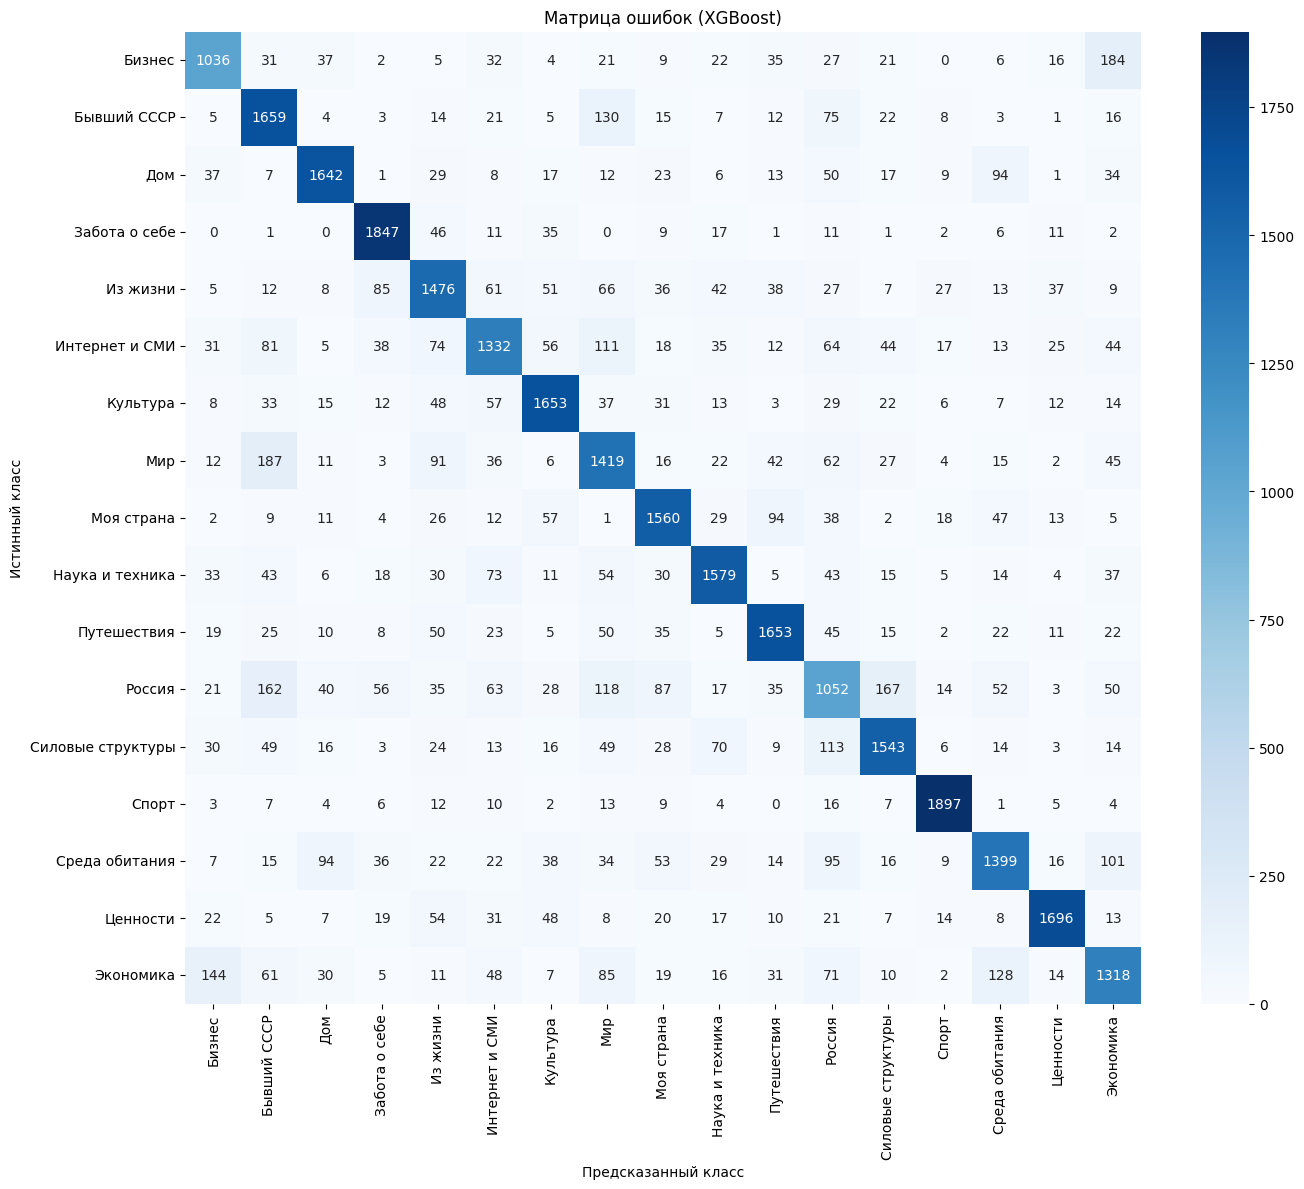

C:\Users\stepan\AppData\Local\Temp\ipykernel_20792\4213479171.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette='viridis')


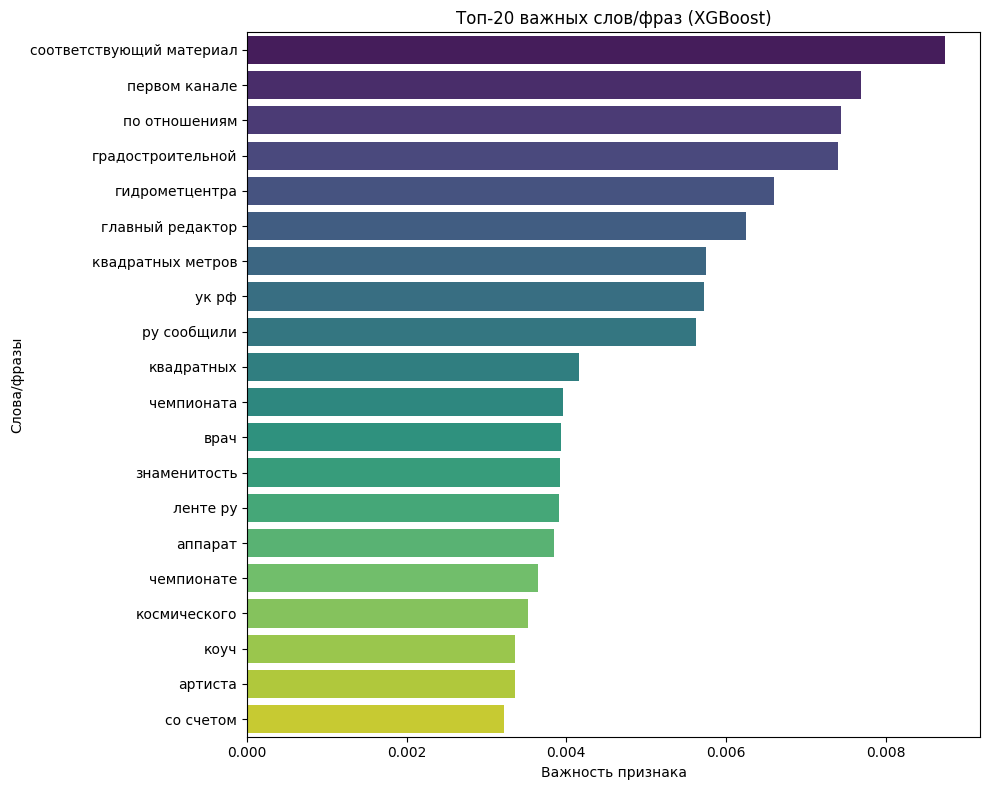

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score
)

from xgboost import XGBClassifier

# --- 1️⃣ Загрузка данных ---
texts = df_balanced['text']
labels = df_balanced['topic']

# --- 2️⃣ Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# --- 3️⃣ Загрузка готового TF-IDF векторизатора ---
vectorizer = joblib.load("tfidf_vectorizer_15000.pkl")

X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# --- 4️⃣ Кодируем метки ---
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# --- 5️⃣ Обучение модели XGBoost ---
model = XGBClassifier(
    tree_method='gpu_hist',
    eval_metric='mlogloss',
    objective='multi:softmax',
    num_class=len(le.classes_),
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    verbosity=1,
    early_stopping_rounds=10,   # ✅ Перенес сюда!
)

model.fit(
    X_train_tfidf,
    y_train_enc,
    eval_set=[(X_test_tfidf, y_test_enc)],
    verbose=True  # если хочешь видеть процесс обучения
)
# --- 6️⃣ Предсказания ---
y_train_pred_enc = model.predict(X_train_tfidf)
y_test_pred_enc = model.predict(X_test_tfidf)

y_train_pred = le.inverse_transform(y_train_pred_enc)
y_test_pred = le.inverse_transform(y_test_pred_enc)

# --- 7️⃣ Метрики на обучении ---
train_accuracy = accuracy_score(y_train, y_train_pred)
train_macro_f1 = f1_score(y_train, y_train_pred, average='macro')
train_weighted_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("📊 Метрики на тренировочной выборке:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Macro F1-score: {train_macro_f1:.4f}")
print(f"Weighted F1-score: {train_weighted_f1:.4f}\n")

# --- 8️⃣ Метрики на тесте ---
print("📊 Classification Report (на тестовой выборке):")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
test_weighted_f1 = f1_score(y_test, y_test_pred, average='weighted')

# --- 🔍 ROC AUC (macro) ---
# Бинаризуем метки
y_test_bin = label_binarize(y_test_enc, classes=np.arange(len(le.classes_)))
# Предсказанные вероятности
y_pred_prob = model.predict_proba(X_test_tfidf)
# ROC AUC
test_roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro')

# --- 🧾 Печать всех метрик ---
print(f"\n📌 Метрики на тестовой выборке:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Macro F1-score: {test_macro_f1:.4f}")
print(f"Weighted F1-score: {test_weighted_f1:.4f}")
print(f"ROC AUC (macro): {test_roc_auc:.4f}")

# --- 8️⃣ Сохранение модели и кодировщика меток ---
joblib.dump(model, "xgb_model.pkl")
joblib.dump(le, "xgb_label_encoder.pkl")

print("Модель XGBoost и LabelEncoder сохранены!")

# --- 9️⃣ Матрица ошибок ---
plt.figure(figsize=(14, 12))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.title('Матрица ошибок (XGBoost)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# --- 🔟 Важность признаков ---
importances = model.feature_importances_
feature_names = vectorizer.get_feature_names_out()

indices = np.argsort(importances)[::-1][:20]
top_features = [feature_names[i] for i in indices]
top_importances = importances[indices]

plt.figure(figsize=(10, 8))
sns.barplot(x=top_importances, y=top_features, palette='viridis')
plt.title('Топ-20 важных слов/фраз (XGBoost)')
plt.xlabel('Важность признака')
plt.ylabel('Слова/фразы')
plt.tight_layout()
plt.show()

In [10]:
import joblib

# Загрузка модели, векторайзера и LabelEncoder
model = joblib.load("xgb_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")
le = joblib.load("xgb_label_encoder.pkl")

# Пример предсказания
sample_text = ["Президент подписал законопроект о поддержке науки."]
sample_tfidf = vectorizer.transform(sample_text)
y_pred_enc = model.predict(sample_tfidf)
pred_class = le.inverse_transform(y_pred_enc)

print(f"Предсказанный класс: {pred_class[0]}")


Предсказанный класс: Россия


e:\универ\диплом\code\.venv\Lib\site-packages\xgboost\core.py:2676: UserWarning: [22:58:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


# LightGBM (через TF-IDF)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.248963 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2524008
[LightGBM] [Info] Number of data points in the train set: 133662, number of used features: 15000
[LightGBM] [Info] Start training from score -3.111419
[LightGBM] [Info] Start training from score -2.815873
[LightGBM] [Info] Start training from score -2.815873
[LightGBM] [Info] Start training from score -2.815873
[LightGBM] [Info] Start training from score -2.815873
[LightGBM] [Info] Start training from score -2.815873
[LightGBM] [Info] Start training from score -2.815873
[LightGBM] [Info] Start training from score -2.815873
[LightGBM] [Info] Start training from score -2.852926
[LightGBM] [Info] Start training from score -2.815873
[LightGBM] [Info] Start training from score -2.815873
[LightGBM] [Info] Start training from score -2.815873
[LightGBM] [Info] Start training from score -2.815873
[L

e:\универ\диплом\code\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\универ\диплом\code\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



📊 Метрики на тренировочной выборке:
Accuracy: 0.9726
Macro F1: 0.9727
Weighted F1: 0.9725

📊 Classification Report (на тестовой выборке):
                   precision    recall  f1-score   support

           Бизнес       0.80      0.77      0.78      1488
      Бывший СССР       0.78      0.85      0.82      2000
              Дом       0.89      0.88      0.88      2000
    Забота о себе       0.91      0.94      0.93      2000
         Из жизни       0.79      0.79      0.79      2000
   Интернет и СМИ       0.77      0.74      0.75      2000
         Культура       0.84      0.87      0.86      2000
              Мир       0.72      0.76      0.74      2000
       Моя страна       0.89      0.87      0.88      1928
  Наука и техника       0.86      0.84      0.85      2000
      Путешествия       0.85      0.87      0.86      2000
           Россия       0.65      0.64      0.65      2000
Силовые структуры       0.84      0.82      0.83      2000
            Спорт       0.95      

e:\универ\диплом\code\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



📌 Метрики на тестовой выборке:
Accuracy: 0.8262
Macro F1: 0.8255
Weighted F1: 0.8260
ROC AUC (macro): 0.9868
Модель LightGBM и LabelEncoder сохранены!


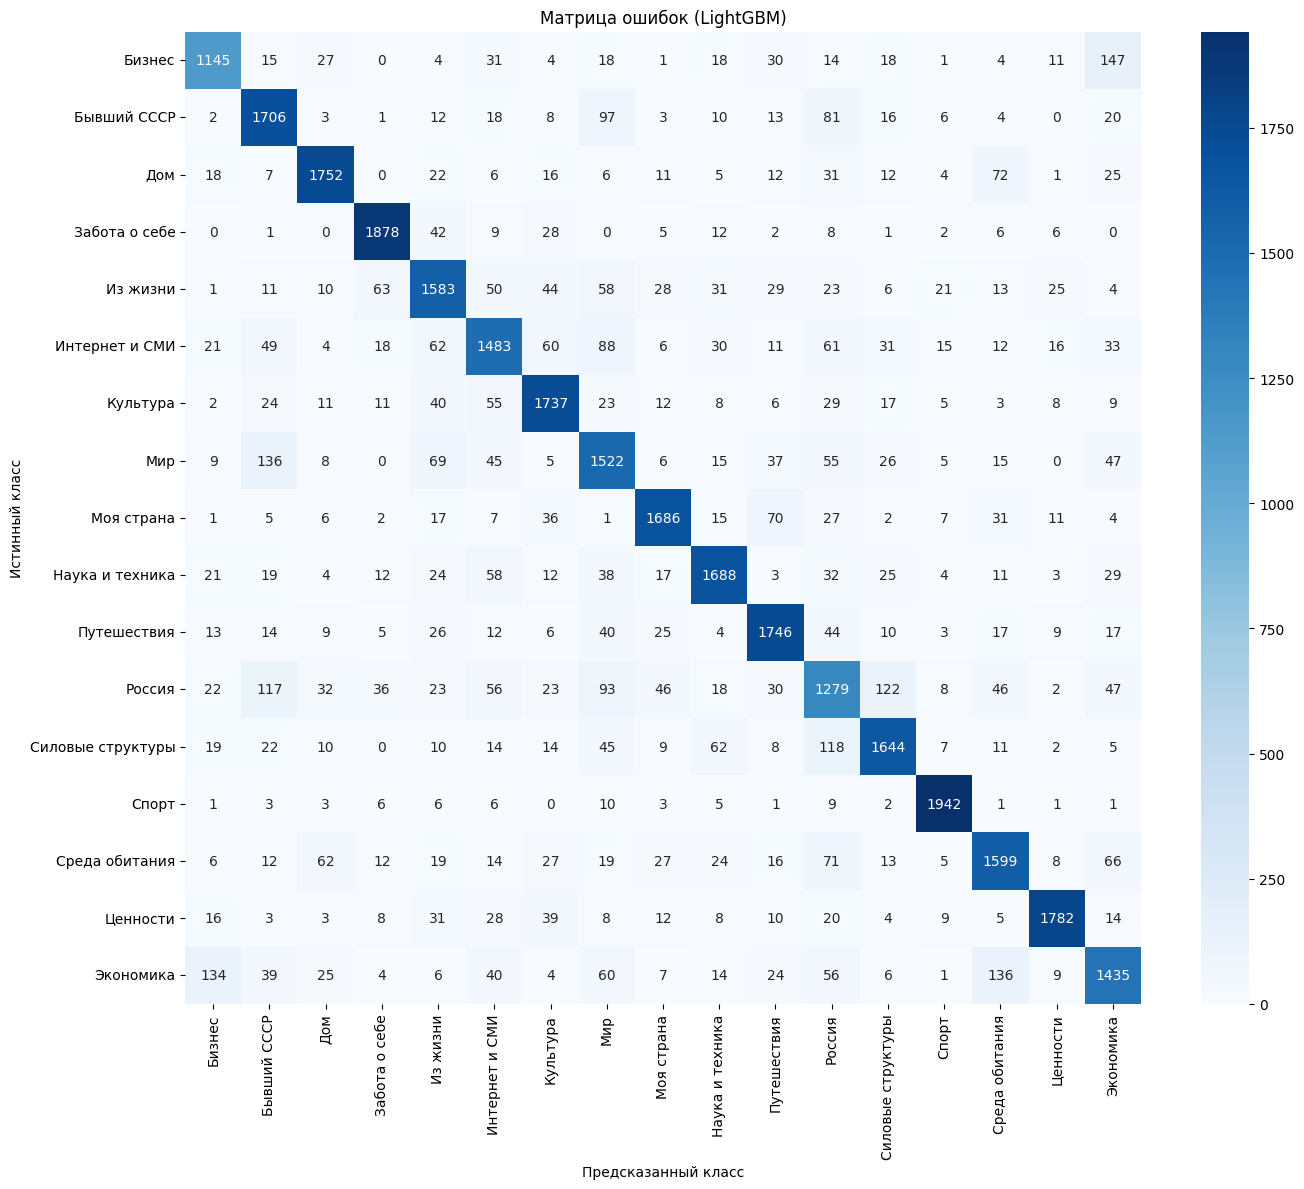

C:\Users\stepan\AppData\Local\Temp\ipykernel_20792\913526234.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette='viridis')


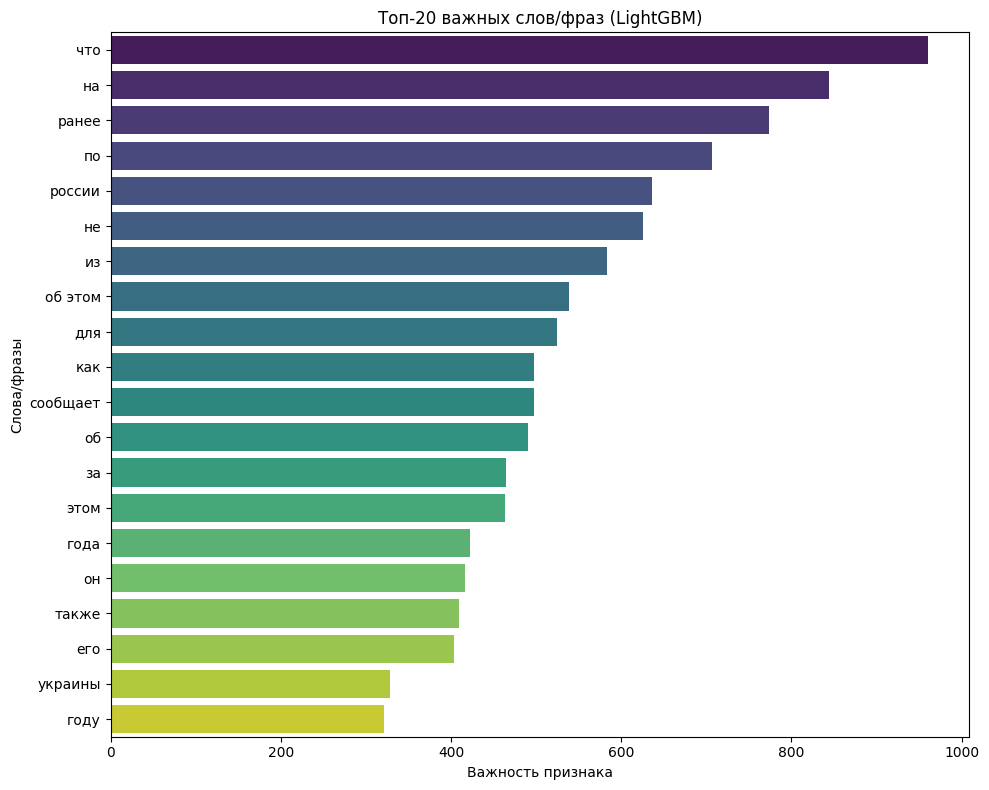

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    roc_auc_score
)

import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation


# --- 1️⃣ Загрузка данных ---
texts = df_balanced['text']
labels = df_balanced['topic']

# --- 2️⃣ Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# --- 3️⃣ Загрузка TF-IDF ---
vectorizer = joblib.load("tfidf_vectorizer_15000.pkl")
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# --- 4️⃣ Кодируем метки ---
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# --- 5️⃣ Обучение LightGBM с ранней остановкой ---
model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(le.classes_),
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

model.fit(
    X_train_tfidf,
    y_train_enc,
    eval_set=[(X_test_tfidf, y_test_enc)],
    eval_metric='multi_logloss',
    callbacks=[early_stopping(stopping_rounds=10), log_evaluation(10)]
)

# --- 6️⃣ Предсказания ---
y_train_pred_enc = model.predict(X_train_tfidf)
y_test_pred_enc = model.predict(X_test_tfidf)

y_train_pred = le.inverse_transform(y_train_pred_enc)
y_test_pred = le.inverse_transform(y_test_pred_enc)

# --- 7️⃣ Метрики обучения ---
print("\n📊 Метрики на тренировочной выборке:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Macro F1: {f1_score(y_train, y_train_pred, average='macro'):.4f}")
print(f"Weighted F1: {f1_score(y_train, y_train_pred, average='weighted'):.4f}")

# --- 8️⃣ Метрики теста + ROC AUC ---
print("\n📊 Classification Report (на тестовой выборке):")
print(classification_report(y_test, y_test_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
test_weighted_f1 = f1_score(y_test, y_test_pred, average='weighted')

y_test_bin = label_binarize(y_test_enc, classes=np.arange(len(le.classes_)))
y_test_prob = model.predict_proba(X_test_tfidf)
test_roc_auc = roc_auc_score(y_test_bin, y_test_prob, average='macro')

print(f"\n📌 Метрики на тестовой выборке:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Macro F1: {test_macro_f1:.4f}")
print(f"Weighted F1: {test_weighted_f1:.4f}")
print(f"ROC AUC (macro): {test_roc_auc:.4f}")

# --- 9️⃣ Сохранение модели и кодировщика ---
joblib.dump(model, "lgb_model.pkl")
joblib.dump(le, "lgb_label_encoder.pkl")
print("Модель LightGBM и LabelEncoder сохранены!")

# --- 🔟 Матрица ошибок ---
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(14, 12))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.title('Матрица ошибок (LightGBM)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# --- 1️⃣1️⃣ Важность признаков ---
importances = model.feature_importances_
feature_names = vectorizer.get_feature_names_out()

indices = np.argsort(importances)[::-1][:20]
top_features = [feature_names[i] for i in indices]
top_importances = importances[indices]

plt.figure(figsize=(10, 8))
sns.barplot(x=top_importances, y=top_features, palette='viridis')
plt.title('Топ-20 важных слов/фраз (LightGBM)')
plt.xlabel('Важность признака')
plt.ylabel('Слова/фразы')
plt.tight_layout()
plt.show()


In [13]:
import joblib

# Загрузка модели, векторайзера и LabelEncoder
model = joblib.load("lgb_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")
le = joblib.load("lgb_label_encoder.pkl")

# Пример предсказания
sample_text = ["Цены на нефть выросли после заявления министра энергетики."]
sample_tfidf = vectorizer.transform(sample_text)
y_pred_enc = model.predict(sample_tfidf)
pred_class = le.inverse_transform(y_pred_enc)

print(f"Предсказанный класс: {pred_class[0]}")

Предсказанный класс: Экономика


e:\универ\диплом\code\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# Catboost

In [3]:
import pandas as pd
df_balanced = pd.read_csv('lenta-ru-news_balanced.csv')  # укажи правильный путь к файлу

0:	learn: 0.1938098	test: 0.1942183	best: 0.1942183 (0)	total: 625ms	remaining: 10m 24s
100:	learn: 0.5904670	test: 0.5904656	best: 0.5904656 (100)	total: 32.6s	remaining: 4m 50s
200:	learn: 0.6595667	test: 0.6560630	best: 0.6560630 (200)	total: 1m 3s	remaining: 4m 12s
300:	learn: 0.6981266	test: 0.6942483	best: 0.6942483 (300)	total: 1m 33s	remaining: 3m 37s
400:	learn: 0.7233170	test: 0.7169919	best: 0.7169919 (400)	total: 2m 3s	remaining: 3m 5s
500:	learn: 0.7409436	test: 0.7327029	best: 0.7328825 (499)	total: 2m 33s	remaining: 2m 32s
600:	learn: 0.7537744	test: 0.7452717	best: 0.7452717 (600)	total: 3m 3s	remaining: 2m 1s
700:	learn: 0.7645030	test: 0.7549677	best: 0.7549677 (700)	total: 3m 33s	remaining: 1m 30s
800:	learn: 0.7728823	test: 0.7628681	best: 0.7628681 (800)	total: 4m 2s	remaining: 1m
900:	learn: 0.7811794	test: 0.7701101	best: 0.7701101 (900)	total: 4m 32s	remaining: 29.9s
999:	learn: 0.7881447	test: 0.7745092	best: 0.7745092 (998)	total: 5m 1s	remaining: 0us
bestTest

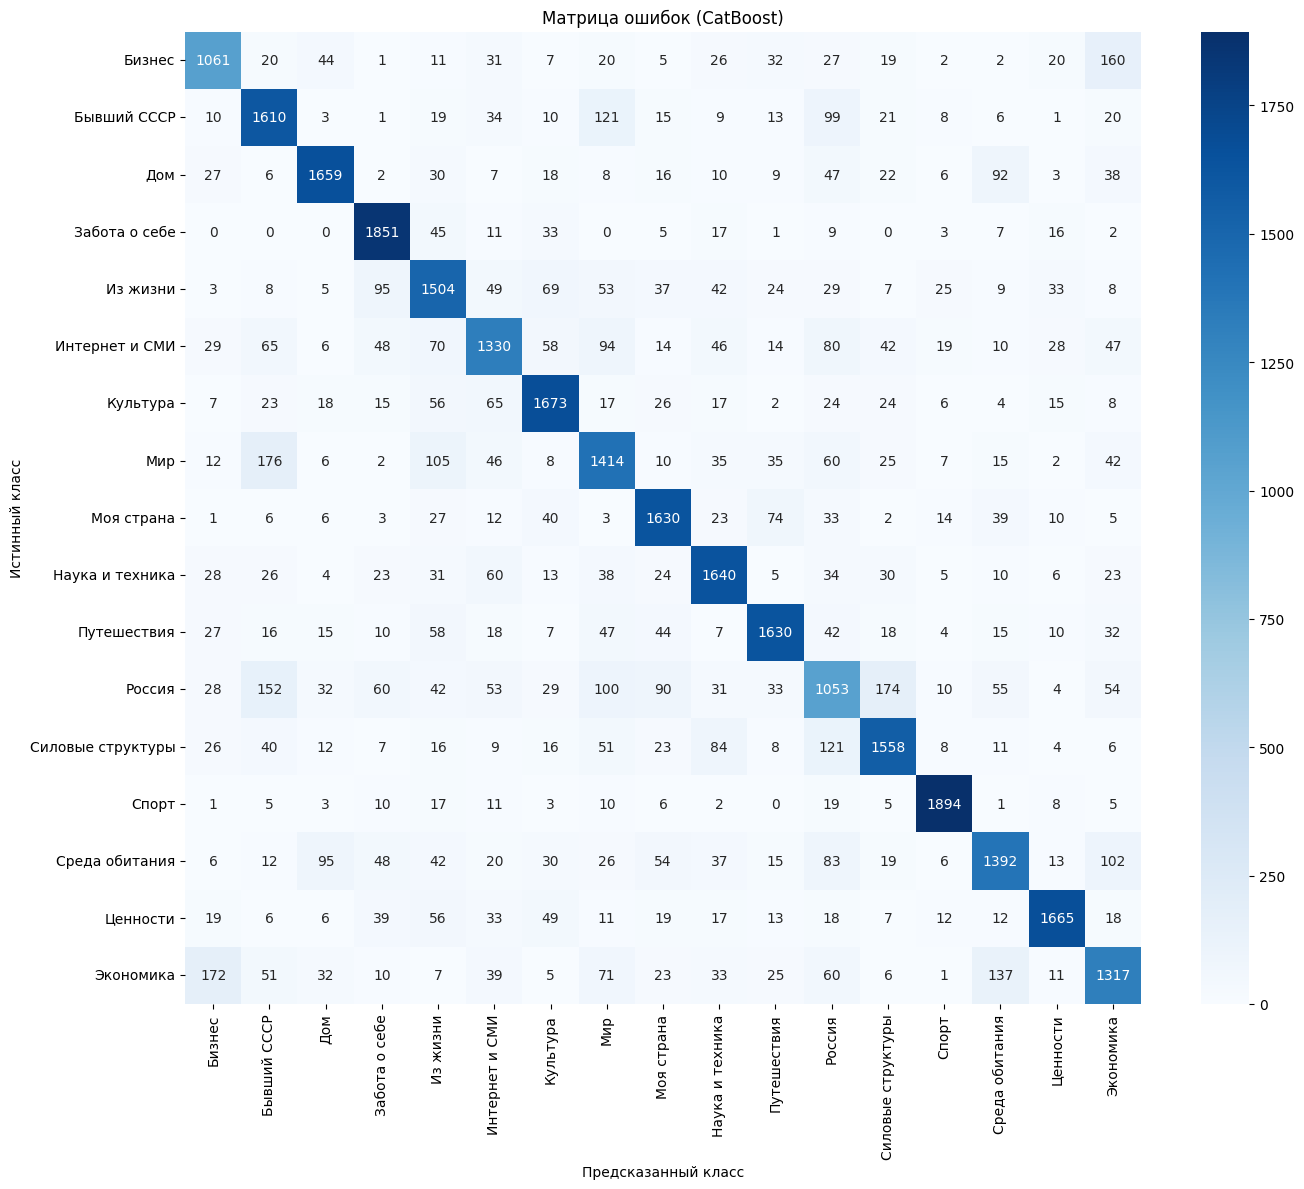

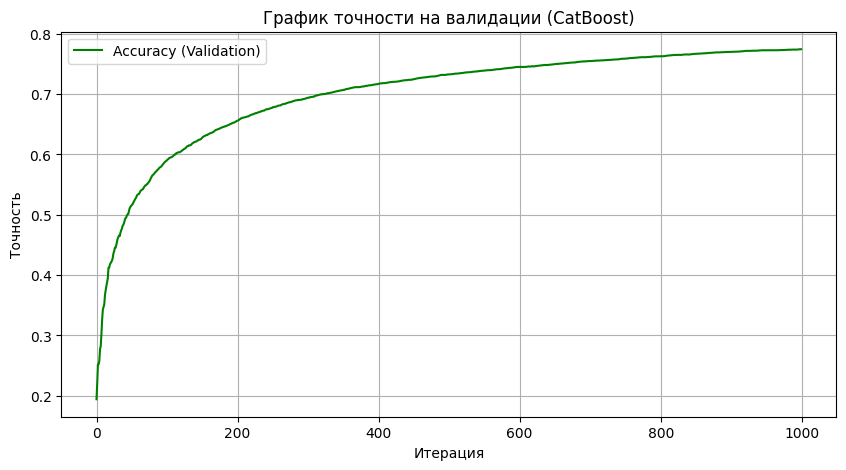

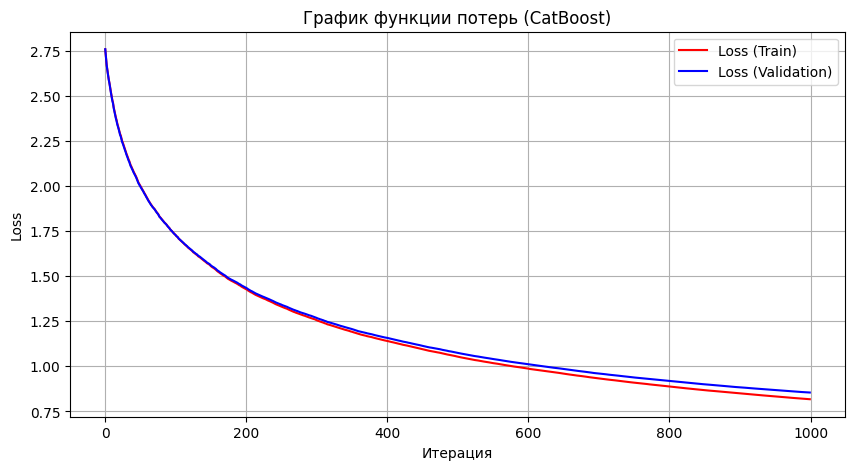

C:\Users\stepan\AppData\Local\Temp\ipykernel_14168\442240999.py:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette='viridis')


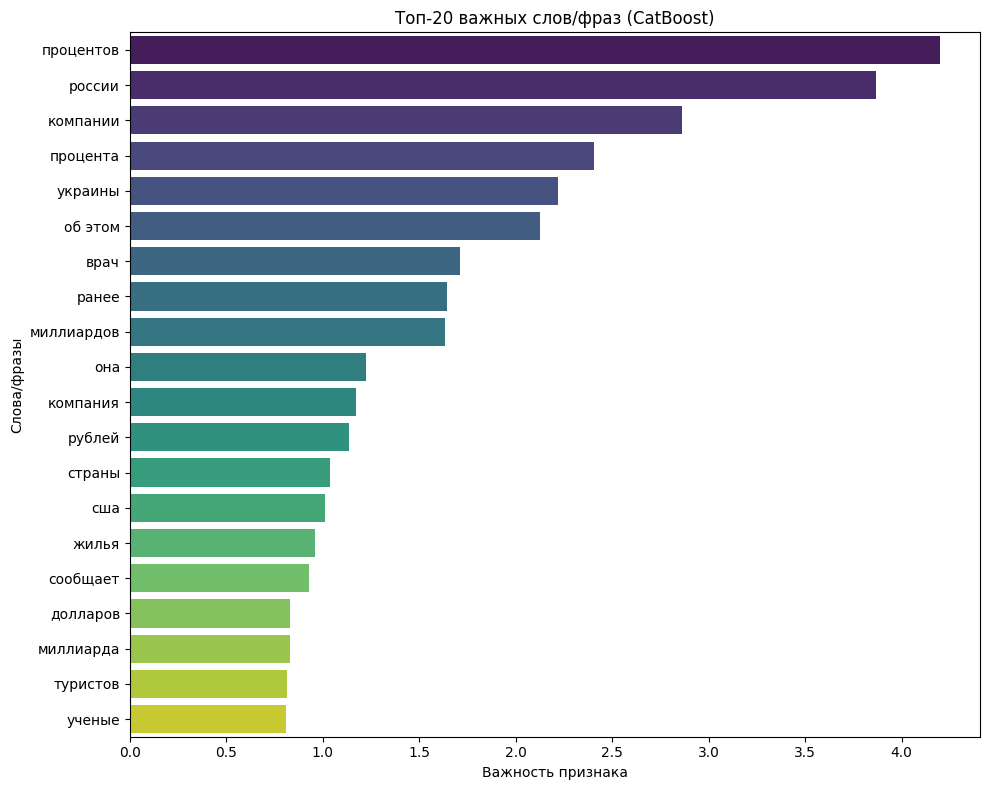

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    roc_auc_score
)

from catboost import CatBoostClassifier

# --- 1️⃣ Данные ---
texts = df_balanced['text']
labels = df_balanced['topic']

# --- 2️⃣ Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# --- 3️⃣ TF-IDF ---
vectorizer = joblib.load("tfidf_vectorizer_15000.pkl")
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# --- 4️⃣ Кодируем метки ---
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# --- 5️⃣ Обучение CatBoost ---
model1 = CatBoostClassifier(
    iterations=100,
    depth=8,
    learning_rate=0.1,
    loss_function='MultiClass',
    #task_type="GPU",
    #devices='0',
    random_seed=42,
    verbose=1
)
model = CatBoostClassifier(
    iterations=1000,               # Лучше больше итераций, но с early_stopping
    learning_rate=0.05,            # Более стабильное обучение
    depth=6,                       # Умеренная глубина (6–8 хорошо работает на TF-IDF)
    loss_function='MultiClass',    # Многоклассовая классификация
    eval_metric='Accuracy',        # Можно также 'TotalF1' или 'MultiClass'
    task_type="GPU",               # GPU ускоряет обучение
    devices='0',                   # Использовать первый GPU
    random_seed=42,                # Для воспроизводимости
    early_stopping_rounds=30,      # Прерывание, если нет улучшения
    verbose=50                    # Вывод каждые 100 итераций
)
model.fit(
    X_train_tfidf,
    y_train_enc,
    eval_set=(X_test_tfidf, y_test_enc),  # <-- важно для логов
    verbose=100,
    early_stopping_rounds=30
)
# --- 6️⃣ Предсказания ---
y_train_pred_enc = model.predict(X_train_tfidf).flatten()
y_test_pred_enc = model.predict(X_test_tfidf).flatten()

y_train_pred = le.inverse_transform(y_train_pred_enc)
y_test_pred = le.inverse_transform(y_test_pred_enc)

# --- 7️⃣ Метрики на обучающей выборке ---
print("\n📊 Метрики на тренировочной выборке:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Macro F1: {f1_score(y_train, y_train_pred, average='macro'):.4f}")
print(f"Weighted F1: {f1_score(y_train, y_train_pred, average='weighted'):.4f}")

# --- 8️⃣ Метрики на тесте ---
print("\n📊 Classification Report (на тестовой выборке):")
print(classification_report(y_test, y_test_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
test_weighted_f1 = f1_score(y_test, y_test_pred, average='weighted')

# --- 9️⃣ ROC AUC (macro) ---
y_test_bin = label_binarize(y_test_enc, classes=np.arange(len(le.classes_)))
y_test_proba = model.predict_proba(X_test_tfidf)
roc_auc = roc_auc_score(y_test_bin, y_test_proba, average='macro')

print(f"\n📌 Метрики на тестовой выборке:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Macro F1: {test_macro_f1:.4f}")
print(f"Weighted F1: {test_weighted_f1:.4f}")
print(f"ROC AUC (macro): {roc_auc:.4f}")

# --- 🔟 Сохранение ---
model.save_model("catboost_model.cbm")
joblib.dump(le, "catboost_label_encoder.pkl")
print("Модель CatBoost и LabelEncoder сохранены!")

# --- 1️⃣1️⃣ Матрица ошибок ---
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(14, 12))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.title('Матрица ошибок (CatBoost)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# --- 📈 Визуализация метрик обучения --- 
evals_result = model.get_evals_result()

# Точность на валидации
plt.figure(figsize=(10, 5))
plt.plot(evals_result['validation']['Accuracy'], label='Accuracy (Validation)', color='green')
plt.xlabel("Итерация")
plt.ylabel("Точность")
plt.title("График точности на валидации (CatBoost)")
plt.legend()
plt.grid(True)
plt.show()

# Потери (ошибка обучения)
plt.figure(figsize=(10, 5))
if 'MultiClass' in evals_result['learn']:
    plt.plot(evals_result['learn']['MultiClass'], label='Loss (Train)', color='red')
if 'MultiClass' in evals_result['validation']:
    plt.plot(evals_result['validation']['MultiClass'], label='Loss (Validation)', color='blue')
plt.xlabel("Итерация")
plt.ylabel("Loss")
plt.title("График функции потерь (CatBoost)")
plt.legend()
plt.grid(True)
plt.show()

# --- 1️⃣2️⃣ Важность признаков ---
importances = model.get_feature_importance()
feature_names = vectorizer.get_feature_names_out()

indices = np.argsort(importances)[::-1][:20]
top_features = [feature_names[i] for i in indices]
top_importances = importances[indices]

plt.figure(figsize=(10, 8))
sns.barplot(x=top_importances, y=top_features, palette='viridis')
plt.title('Топ-20 важных слов/фраз (CatBoost)')
plt.xlabel('Важность признака')
plt.ylabel('Слова/фразы')
plt.tight_layout()
plt.show()

In [8]:
# --- 📈 Визуализация метрик обучения --- 
evals_result = model.get_evals_result()

# Точность на валидации
plt.figure(figsize=(10, 5))
plt.plot(evals_result['validation']['Accuracy'], label='Accuracy (Validation)', color='green')
plt.xlabel("Итерация")
plt.ylabel("Точность")
plt.title("График точности на валидации (CatBoost)")
plt.legend()
plt.grid(True)
plt.show()

# Потери (ошибка обучения)
plt.figure(figsize=(10, 5))
if 'MultiClass' in evals_result['learn']:
    plt.plot(evals_result['learn']['MultiClass'], label='Loss (Train)', color='red')
if 'MultiClass' in evals_result['validation']:
    plt.plot(evals_result['validation']['MultiClass'], label='Loss (Validation)', color='blue')
plt.xlabel("Итерация")
plt.ylabel("Loss")
plt.title("График функции потерь (CatBoost)")
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'validation'

<Figure size 1000x500 with 0 Axes>

In [2]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
print(model.get_params())

{}


In [6]:
import joblib
from catboost import CatBoostClassifier

# Загрузка
model = CatBoostClassifier()
model.load_model("catboost_model.cbm")
vectorizer = joblib.load("tfidf_vectorizer_15000.pkl")
le = joblib.load("catboost_label_encoder.pkl")

# Пример предсказания
sample_text = ["Государство инвестировало в новые научные проекты."]
sample_tfidf = vectorizer.transform(sample_text)  # исправлено!

y_pred_enc = model.predict(sample_tfidf).flatten()
pred_class = le.inverse_transform(y_pred_enc)

print(f"Предсказанный класс: {pred_class[0]}")



Предсказанный класс: Спорт
